# DECISION TREE

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
data_train = pd.read_csv('training_processed.csv')
data_valid = pd.read_csv('validation_processed.csv')

labels_train = data_train['ACTIVE']# ground truth labels
features_train = data_train.drop(['ACTIVE'], axis=1) 
labels_valid = data_valid['ACTIVE']# ground truth labels
features_valid = data_valid.drop(['ACTIVE'], axis=1)

In [3]:
dec_tree = DecisionTreeClassifier()
dec_tree_parameters = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2', None]}
cross_val = KFold(n_splits=5)
dec_tree_grid_search = GridSearchCV(estimator=dec_tree, param_grid=dec_tree_parameters, cv=cross_val, scoring=['roc_auc','accuracy'], refit='roc_auc')
dec_tree_grid_result = dec_tree_grid_search.fit(features_train, labels_train)
# summarize results

print("Best: %f using %s" % (dec_tree_grid_result.best_score_, dec_tree_grid_result.best_params_))
print("Average AUC for Decision Tree: ", np.mean(dec_tree_grid_result.cv_results_['mean_test_roc_auc']))
print("Average Accuracy for Decision Tree: ", np.mean(dec_tree_grid_result.cv_results_['mean_test_accuracy']))

d:\Users\annik\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Users\annik\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Users\annik\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Users\annik\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behavi

Best: 0.528451 using {'criterion': 'gini', 'max_features': None, 'splitter': 'random'}
Average AUC for Decision Tree:  0.5216541896692297
Average Accuracy for Decision Tree:  0.9812430177805367


In [4]:
results = pd.DataFrame(dec_tree_grid_result.cv_results_)

[Text(0.5, 1.0, 'ROC_AUC of a Decision Tree with K-Fold-Cross Validation\n')]

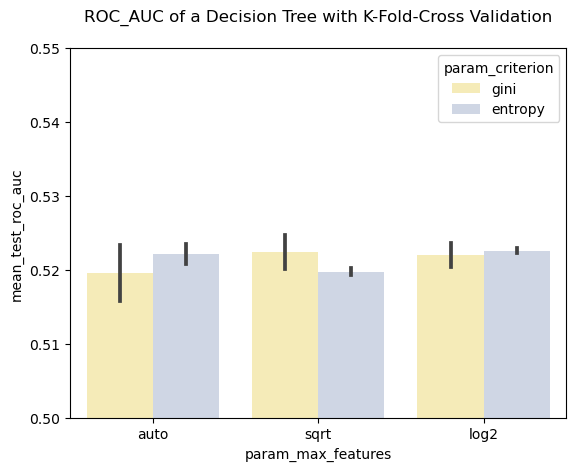

In [8]:
plot = sns.barplot(data=results, x='param_max_features', y='mean_test_roc_auc', hue='param_criterion', palette='Pastel2_r')
plot.set(ylim=(0.5, 0.55))
plot.set(title='ROC_AUC of a Decision Tree with K-Fold-Cross Validation\n')

[Text(0.5, 1.0, 'ROC_AUC of a Decision Tree with K-Fold-Cross Validation\n')]

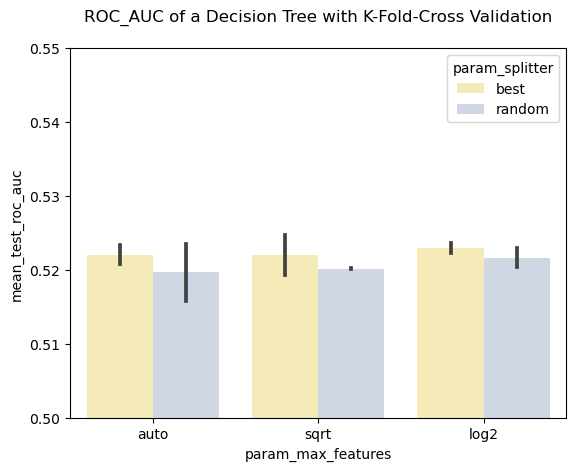

In [11]:
plot = sns.barplot(data=results, x='param_max_features', y='mean_test_roc_auc', hue='param_splitter', palette='Pastel2_r')
plot.set(ylim=(0.5, 0.55))
plot.set(title='ROC_AUC of a Decision Tree with K-Fold-Cross Validation\n')

[Text(0.5, 1.0, 'Accuracy of a Decision Tree with K-Fold-Cross Validation\n')]

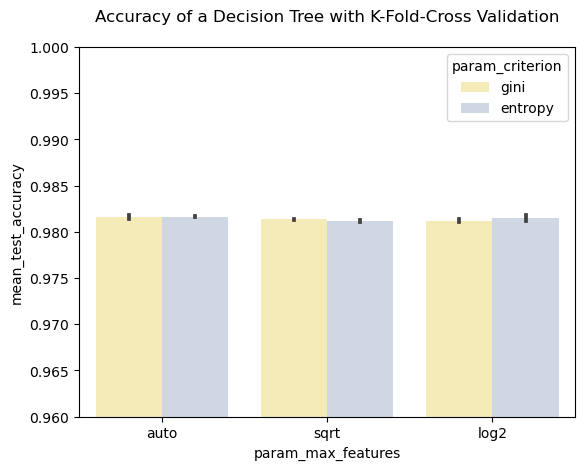

In [13]:
plot = sns.barplot(data=results, x='param_max_features', y='mean_test_accuracy', hue='param_criterion', palette='Pastel2_r')
plot.set(ylim=(0.96, 1))
plot.set(title='Accuracy of a Decision Tree with K-Fold-Cross Validation\n')

[Text(0.5, 1.0, 'Accuracy of a Decision Tree with K-Fold-Cross Validation\n')]

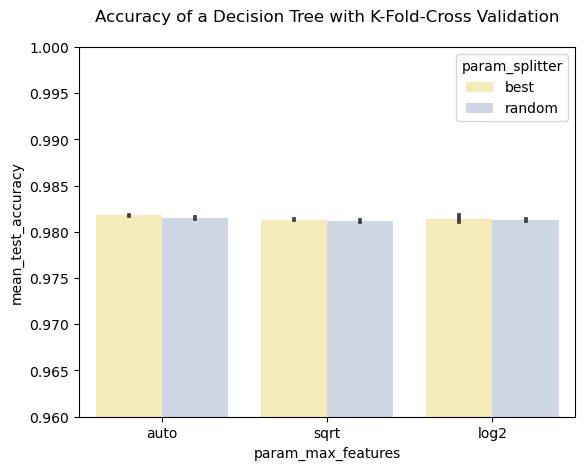

In [15]:
plot = sns.barplot(data=results, x='param_max_features', y='mean_test_accuracy', hue='param_splitter', palette='Pastel2_r')
plot.set(ylim=(0.96, 1))
plot.set(title='Accuracy of a Decision Tree with K-Fold-Cross Validation\n')